<a href="https://colab.research.google.com/github/AKVITA380/Deep-Learning-6-July-2024/blob/main/BinaryClassification1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Binary Classification Problem**

In [3]:
from warnings import filterwarnings
filterwarnings('ignore')

**Step 1 : Read The Dataset**

In [4]:
import pandas as pd
url="https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/booking_train.csv"
df=pd.read_csv(url)

In [5]:
df

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42095,42095,3,0,0,4,0,0,1,160,2018,12,30,1,0,0,0,140.00,2,1
42096,42096,2,0,0,3,0,0,0,34,2017,9,23,0,0,0,0,224.67,0,0
42097,42097,2,0,0,2,2,0,0,292,2018,7,21,0,0,0,0,96.00,0,0
42098,42098,1,0,0,3,0,0,0,5,2018,11,9,0,0,0,0,120.00,0,0


**Step 2: Perform basic data quality checks**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42100 entries, 0 to 42099
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    42100 non-null  int64  
 1   no_of_adults                          42100 non-null  int64  
 2   no_of_children                        42100 non-null  int64  
 3   no_of_weekend_nights                  42100 non-null  int64  
 4   no_of_week_nights                     42100 non-null  int64  
 5   type_of_meal_plan                     42100 non-null  int64  
 6   required_car_parking_space            42100 non-null  int64  
 7   room_type_reserved                    42100 non-null  int64  
 8   lead_time                             42100 non-null  int64  
 9   arrival_year                          42100 non-null  int64  
 10  arrival_month                         42100 non-null  int64  
 11  arrival_date   

In [8]:
df.isna().sum()

id                                      0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [9]:
df.duplicated().sum()

0

**Step 3: Seperate X and Y(booking_status)**

In [10]:
X=df.drop(columns=['id','booking_status'])
Y=df[['booking_status']]

In [11]:
X.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0
1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0
2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0
3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0
4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0


In [12]:
Y.head()

,booking_status
0,0
1,0
2,0
3,0
4,1


**Step 4: Perform preprocessing on X**

In [13]:
X.dtypes

no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                         int64
required_car_parking_space                int64
room_type_reserved                        int64
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                       int64
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
dtype: object

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [17]:
num_pipe= Pipeline(steps=[("impute",SimpleImputer(strategy="median")),
                         ("scaler",StandardScaler())]).set_output(transform='pandas')

In [18]:
X_pre=num_pipe.fit_transform(X)

In [19]:
X_pre.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,0.151040,-0.313454,-0.998814,-0.278849,1.294624,-0.160945,-0.515173,-1.170469,0.409661,-2.330398,-0.214091,0.428551,5.766758,33.699120,-0.101479,-0.998052,-0.737691
1,0.151040,-0.313454,0.130259,-0.278849,-0.407020,-0.160945,-0.515173,0.161740,0.409661,-0.209778,1.473487,-1.149928,-0.173408,-0.060506,-0.101479,-0.870153,-0.737691
2,0.151040,-0.313454,-0.998814,-0.979466,-0.407020,-0.160945,-0.515173,2.604122,0.409661,1.557404,-1.564154,-1.149928,-0.173408,-0.060506,-0.101479,-1.415406,-0.737691
3,-1.753925,-0.313454,-0.998814,-0.278849,1.294624,-0.160945,-0.515173,-0.886758,0.409661,1.557404,-1.676659,0.428551,-0.173408,-0.060506,-0.101479,-1.307702,-0.737691
4,0.151040,-0.313454,0.130259,-1.680084,-0.407020,-0.160945,-0.515173,1.901012,0.409661,0.850531,0.010919,-1.149928,-0.173408,-0.060506,-0.101479,-0.122955,-0.737691


**Step 5: Train test split**

In [20]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X_pre,Y,test_size=0.2,random_state=42)

In [21]:
xtrain.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
15559,0.151040,-0.313454,-0.998814,0.421768,-0.407020,-0.160945,0.685890,-0.479694,0.409661,1.203968,-1.564154,-1.149928,-0.173408,-0.060506,-0.101479,-1.199998,1.842849
32783,0.151040,-0.313454,0.130259,1.122386,-0.407020,-0.160945,0.685890,-0.381012,0.409661,1.557404,1.135971,0.428551,-0.173408,-0.060506,-0.101479,0.189388,0.552579
11797,2.056005,-0.313454,-0.998814,0.421768,-0.407020,-0.160945,0.685890,-0.282330,0.409661,0.497095,-0.889123,0.428551,-0.173408,-0.060506,-0.101479,1.716096,-0.737691
39750,0.151040,-0.313454,-0.998814,-0.979466,2.996268,-0.160945,-0.515173,1.444607,0.409661,0.143658,-0.439102,-1.149928,-0.173408,-0.060506,-0.101479,0.280936,0.552579
28711,0.151040,-0.313454,1.259332,0.421768,-0.407020,-0.160945,0.685890,-0.109636,0.409661,0.850531,-1.001628,0.428551,-0.173408,-0.060506,-0.101479,0.746758,-0.737691


In [22]:
ytrain.head()

,booking_status
15559,0
32783,0
11797,1
39750,1
28711,1


In [23]:
xtest.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
8768,0.15104,-0.313454,-0.998814,0.421768,-0.40702,-0.160945,-0.515173,-0.566041,0.409661,-2.330398,1.135971,-1.149928,-0.173408,-0.060506,-0.101479,-0.643436,0.552579
38340,0.15104,-0.313454,-0.998814,-0.278849,-0.40702,-0.160945,-0.515173,1.481613,0.409661,0.143658,-1.564154,0.428551,-0.173408,-0.060506,-0.101479,-0.285588,-0.737691
7104,0.15104,-0.313454,1.259332,-0.979466,-0.40702,-0.160945,4.289080,-0.553706,0.409661,-1.623525,1.023466,0.428551,-0.173408,-0.060506,-0.101479,0.002252,-0.737691
36898,0.15104,1.908162,1.259332,1.122386,-0.40702,-0.160945,-0.515173,-0.566041,0.409661,1.203968,-0.551607,0.428551,-0.173408,-0.060506,-0.101479,0.541312,3.133119
9747,0.15104,-0.313454,1.259332,0.421768,-0.40702,-0.160945,-0.515173,0.507127,0.409661,-1.270088,1.585992,0.428551,-0.173408,-0.060506,-0.101479,-0.366636,0.552579


In [24]:
ytest.head()

,booking_status
8768,0
38340,1
7104,0
36898,0
9747,0


In [25]:
xtrain.shape

(33680, 17)

In [26]:
ytrain.shape

(33680, 1)

**Building a neural network**

In [27]:
xtrain.shape[1]

17

**Dropout layer - Randomly drop some % of neuron links**

In [28]:
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout

In [29]:
# Initialize the model
model = Sequential()

# Input Layer
model.add(Input(shape=(xtrain.shape[1], )))

# Hidden Layer 1
model.add(Dense(64, activation='relu'))
# Add Dropout layer 1
model.add(Dropout(0.4))

# Hidden Layer 2
model.add(Dense(32, activation='relu'))
# Add Dropout layer 2
model.add(Dropout(0.3))

# Add output layer
model.add(Dense(1, activation='sigmoid'))

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1152      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3265 (12.75 KB)
Trainable params: 3265 (12.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
model.compile(loss='binary_crossentropy',
              metrics=["accuracy"],
              optimizer='adam')

In [32]:

hist = model.fit(xtrain, ytrain, validation_split=0.2, epochs=60)


Epoch 1/60
842/842 [==============================] - 7s 4ms/step - loss: 0.5280 - accuracy: 0.7374 - val_loss: 0.4851 - val_accuracy: 0.7669
Epoch 2/60
842/842 [==============================] - 3s 4ms/step - loss: 0.4869 - accuracy: 0.7685 - val_loss: 0.4749 - val_accuracy: 0.7761
Epoch 3/60
842/842 [==============================] - 3s 4ms/step - loss: 0.4802 - accuracy: 0.7719 - val_loss: 0.4705 - val_accuracy: 0.7791
Epoch 4/60
842/842 [==============================] - 3s 3ms/step - loss: 0.4752 - accuracy: 0.7761 - val_loss: 0.4702 - val_accuracy: 0.7809
Epoch 5/60
842/842 [==============================] - 3s 4ms/step - loss: 0.4722 - accuracy: 0.7791 - val_loss: 0.4682 - val_accuracy: 0.7830
Epoch 6/60
842/842 [==============================] - 3s 4ms/step - loss: 0.4667 - accuracy: 0.7820 - val_loss: 0.4643 - val_accuracy: 0.7813
Epoch 7/60
842/842 [==============================] - 4s 4ms/step - loss: 0.4654 - accuracy: 0.7834 - val_loss: 0.4637 - val_accuracy: 0.7846
Epoch 

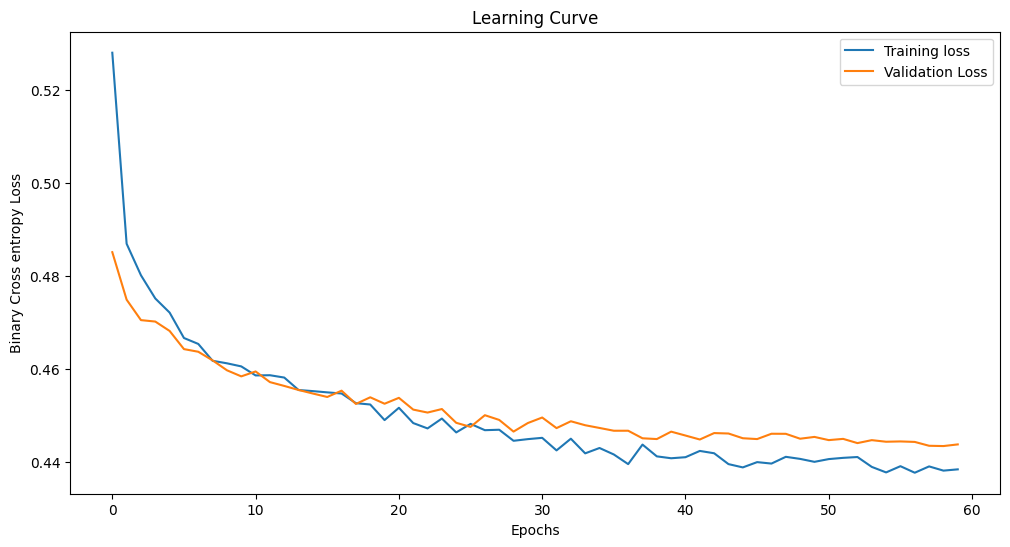

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(hist.history['loss'], label='Training loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Binary Cross entropy Loss")
plt.title("Learning Curve")
plt.legend()
plt.show()

In [34]:
model.evaluate(xtrain, ytrain)

1053/1053 [==============================] - 2s 2ms/step - loss: 0.4215 - accuracy: 0.8113


[0.4214942157268524, 0.8113420605659485]

In [35]:
model.evaluate(xtest, ytest)

264/264 [==============================] - 1s 2ms/step - loss: 0.4288 - accuracy: 0.8039


[0.42876848578453064, 0.80391925573349]

**Get predictions on train and test**

In [36]:
yprob_train = model.predict(xtrain)
yprob_test = model.predict(xtest)

264/264 [==============================] - 0s 2ms/step


In [37]:
yprob_train[0:5]

array([[0.00553897],
       [0.1956509 ],
       [0.88503575],
       [0.7436123 ],
       [0.871834  ]], dtype=float32)

In [38]:
ytrain.head()

,booking_status
15559,0
32783,0
11797,1
39750,1
28711,1


In [39]:
ypred_train = [1 if prob>=0.5 else 0 for prob in yprob_train]
ypred_test = [1 if prob>=0.5 else 0 for prob in yprob_test]



In [40]:
ypred_train[0:5]

[0, 0, 1, 1, 1]

In [41]:
ytest.head()

,booking_status
8768,0
38340,1
7104,0
36898,0
9747,0


In [42]:
ypred_test[0:5]

[0, 1, 0, 0, 0]

In [43]:
yprob_test[0:5]

array([[0.0461477 ],
       [0.9277056 ],
       [0.25533545],
       [0.01688582],
       [0.16303751]], dtype=float32)

**Confusion Matrix**